In [2]:
import re
import string
from numpy.random import choice
import random

"""READ FILE IN TO PLAY"""

with open('extra.txt', 'r') as seuss_script:
    # open txt file and read to string, string to lower
    seussical = seuss_script.read()
    seussical = seussical.lower()

# use regex to split text into words and punctuation, including contracted words
seuss_string = re.findall(r"[.,]|[a-z]+[']?[a-z]+", seussical)

"""CREATE OUR NESTED DICT TO SAVE HOW OFTEN ONE WORD FOLLOWS ANOTHER"""

seuss_dict = {}
# for loop that runs over every word in our string, but stating to stop at the last word
for i, word in enumerate(seuss_string[:-1]):
    # setting this word to be the word right after the one we were on
    this_word = seuss_string[i - 1]
    # if this_word isnt in our dictionary already...
    if this_word not in seuss_dict:
        # start our counter dict
        next_count = {}
        # add our new word to be a key in our seuss dict and the count dict to be its value
        seuss_dict[this_word] = next_count
    # if it is already in there....
    else:
        # create empty dictionary with this_word as the key and next_count as the value
        next_count = seuss_dict[this_word]
    # if the next word(word) is in our nested dict already...
    if word in next_count:
        # add one to its count
        next_count[word] += 1
    # if its not already in there
    else:
        # lets add it and set its count to 1
        next_count[word] = 1


import json

# print(json.dumps(seuss_dict, indent=4))

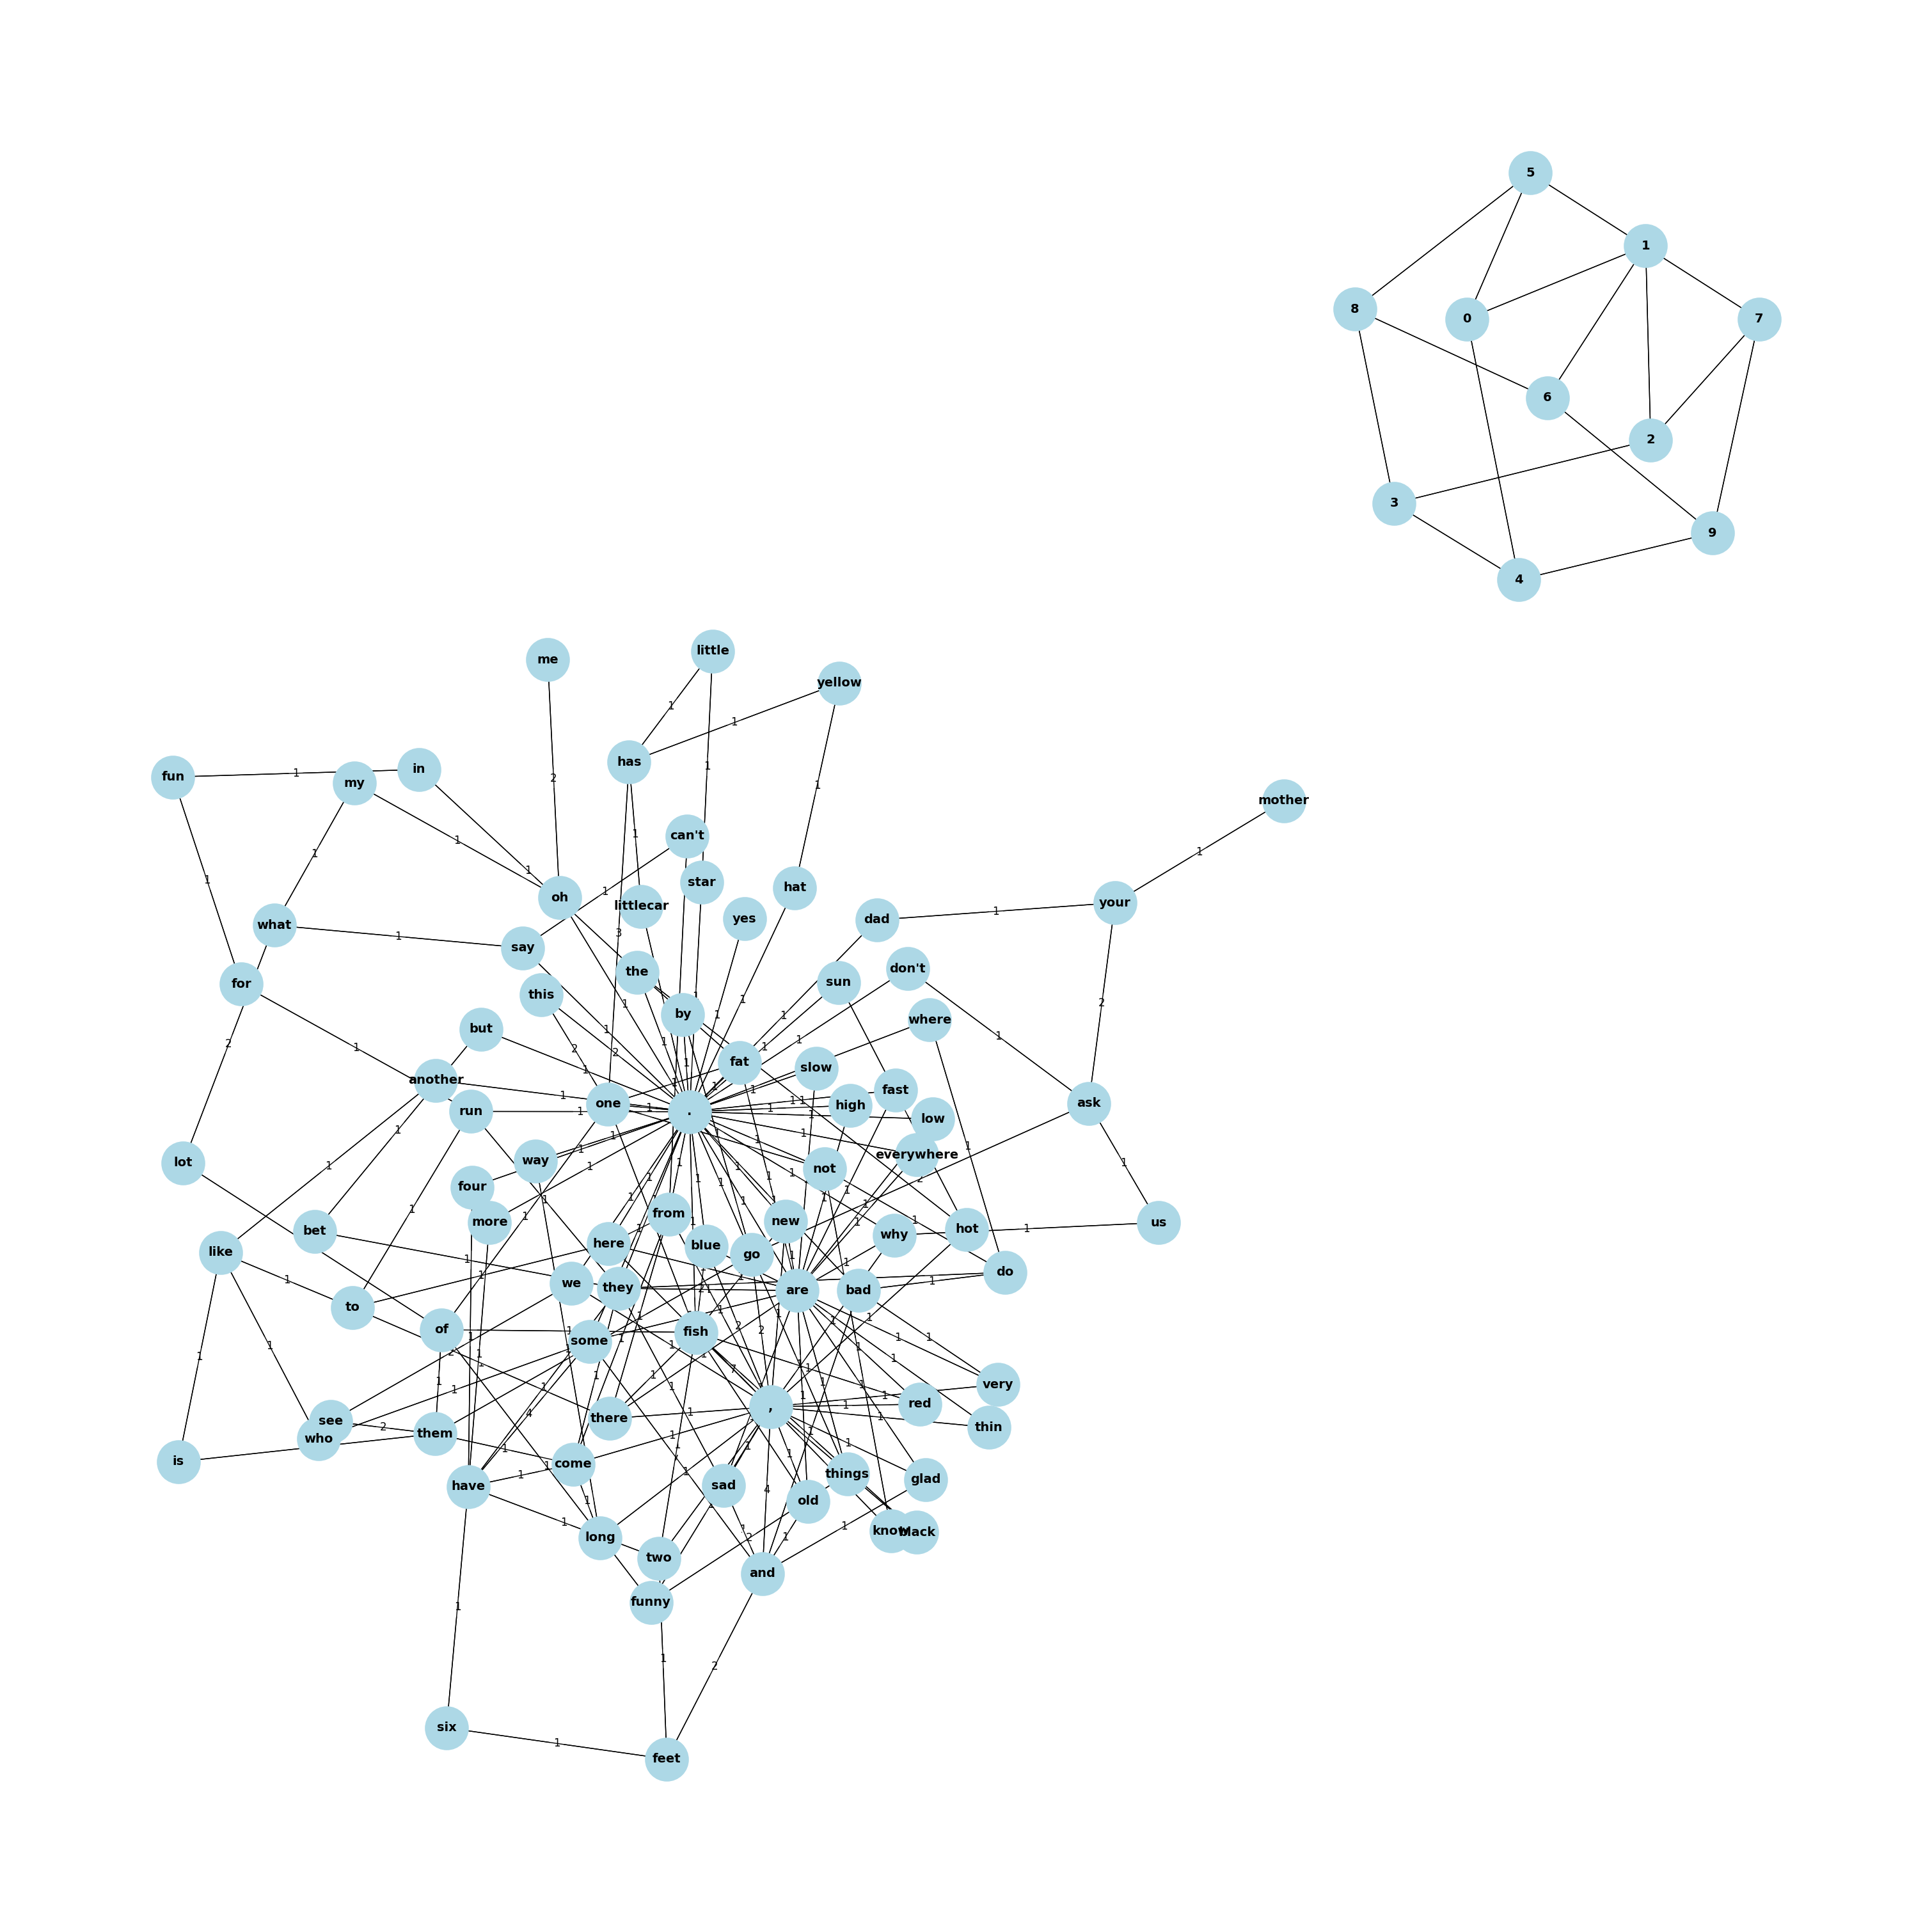

In [237]:
import seaborn as sns
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from collections import Counter


G = nx.petersen_graph()



z = {}
nodes = ()
sx = []

for k, v in seuss_dict.items():
    
    

    for key, value in v.items():
        sx.append((k, key))
        G.add_edge(k, key, weight=value)

# pos = nx.graphviz_layout(G)

# G.margins(4)
pos = nx.nx_agraph.graphviz_layout(G)
plt.figure(figsize=(30, 30))
nx.draw(G, pos,
        node_size=2200, node_color='lightblue', linewidths=2.5,
        font_size=14, font_weight='bold', with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(
    G, pos, font_size=12, edge_labels=labels, rotate=False)
nx.draw_networkx_edges(G, pos, arrows=True)
# nx.edge_attr.update(arrowhead='vee', arrowsize='2')
# print(G)

plt.show()
# print(nodes)
# print(type(nodes))
# print(edges)
# df = pd.DataFrame.from_dict(d,orient="index").T
# G = nx.read_edgelist(seuss_dict)
# # print(edges)
#         # print(value)

# # G.edges()


# # <matplotlib.figure.Figure object at 0x7f1b65ea5e80>
# plt.figure(figsize=(20, 14))
# nx.draw(G, pos=nx.nx_pydot.graphviz_layout(G),
#         node_size=1200, node_color='lightblue', linewidths=2.0,
#         font_size=10, font_weight='bold', with_labels=True)
# # Get current axis:
# ax = plt.gca()
# ax.collections[0].set_edgecolor('r')
# # r : red (can also use #FF0000) | b : black (can also use #000000) | ...
# plt.show()



In [22]:
d = {}
for k, v in seuss_dict.items():
    # print(v)
    for k, value in v.items():
        d.update({k: v})
# print(d)
df = pd.DataFrame.from_dict(d, orient="index").T




EdgeView([])

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# df = pd.DataFrame(seuss_dict)
# df.fillna(0, inplace=True)
# print(df)

d = {}
for k, v in seuss_dict.items():
    print(v)
    # for k, value in v.items():
# print(d)


# df = pd.DataFrame.from_dict(d,orient="index").T


# plt.figure(figsize=(15, 5))
# xlabels = list(d.keys())

# for i, k in d.items():
#     for key, value in k.items():

#         plt.scatter([i]*len(d), d[k], c="#396B8B")

# plt.xticks(list(range(1, len(xlabels)+1)), xlabels, rotation='horizontal')
# plt.grid(axis="y")
# plt.title("Molecular Weight by Sequence ID")
# plt.ylabel("Molecular Weight")
# plt.show()
# d = {}
# for k, v in seuss_dict.items():

    
# # print(d)

#     row_tups = []
#     for key, value in v.items():
#         row_tups.append((key, value))
#     row_tups.sort(key=lambda tup: tup[1], reverse=True)
#     # print(row_tups)
#     d.update({k: row_tups})
# print(d)
# d = d.T
# df = pd.DataFrame.from_dict(d,orient="index")

# df.to_csv("fish_table.csv", index=False)
    


{'one': 1, 'this': 2, 'say': 1, 'yes': 1, 'some': 10, 'why': 1, 'the': 1, 'from': 1, 'here': 1, 'they': 1, 'oh': 1, 'where': 1, 'but': 1, 'we': 1, 'not': 1, "don't": 1}
{'fish': 1, 'has': 3, 'of': 1}
{',': 7, '.': 1, 'there': 1}
{'two': 1, 'red': 1, 'blue': 2, 'black': 1, 'old': 1, 'new': 1, 'and': 4, 'very': 1, 'go': 2, 'from': 1, 'funny': 1, 'hot': 1, 'long': 1, 'we': 1}
{'fish': 1, 'feet': 1}
{'fish': 1, ',': 1}
{'fish': 2, '.': 1}
{'fish': 1}
{'fish': 1, 'and': 1}
{'fish': 1, '.': 1}
{'one': 2}
{'littlecar': 1, 'little': 1, 'yellow': 1}
{'.': 1}
{'star': 1}
{'.': 1}
{'what': 1, '.': 1}
{'lot': 2}
{'of': 2}
{'fish': 1, 'funny': 1, 'them': 1}
{'are': 1, 'to': 1, ',': 1}
{'.': 1, 'red': 1, 'blue': 1, 'old': 1, 'new': 1, 'sad': 1, 'glad': 1, 'very': 1, 'they': 1, 'thin': 1, 'fat': 1, 'everywhere': 1, 'some': 1, 'fast': 1, 'slow': 1, 'high': 1, 'low': 1}
{'.': 1}
{'are': 13, 'who': 1, 'have': 4}
{'some': 7, 'glad': 1, 'bad': 1}
{',': 1, 'and': 1}
{',': 1, 'and': 1}
{',': 1, 'bad': 1}
{'

In [61]:
import itertools
import matplotlib.pyplot as plt




# Flatten keys list

# Produces y = ['4026', '4024', '1940', '2912', '2916, '3139', '2464',...]
# y = [val for subl in d.values() for val in subl]

# ax.plot(x, y, 'ro')
# plt.show()


['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', 'one', 'one', 'one', 'fish', 'fish', 'fish', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', ',', 'two', 'two', 'red', 'red', 'blue', 'blue', 'black', 'old', 'old', 'new', 'new', 'this', 'has', 'has', 'has', 'littlecar', 'little', 'star', 'say', 'say', 'what', 'lot', 'of', 'of', 'of', 'there', 'there', 'there', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'are', 'yes', 'some', 'some', 'some', 'and', 'and', 'and', 'sad', 'sad', 'glad', 'glad', 'very', 'very', 'bad', 'bad', 'why', 'why', 'they', 'they', 'they', 'they', 'do', 'do', 'not', 'not', 'know', 'go', 'go', 'go', 'ask', 'ask', 'your', 'your', 'dad', 'thin', 'fat', 'fat', 'the', 'the', 'yellow', 'hat', 'from', 'from', 'from', 'to', 'to', 'to', 'here', 'here', 'here', 'funny', 'things', 'things', 'everywhere', 'who', 'like', 'like', 'run', 'run', 'for', 'fun', 'in', 'hot